In [1]:
import pandas as pd
import numpy as np

import re
import matplotlib.pyplot as plt
import scrapy
from scrapy.crawler import CrawlerProcess

import json

import logging

In [2]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.6.12'

In [3]:


class JsonWriterPipeline(object):

    def open_spider(self, spider):
        self.file = open('quoteresult.jl', 'w')

    def close_spider(self, spider):
        self.file.close()

    def process_item(self, item, spider):
        line = json.dumps(dict(item)) + "\n"
        self.file.write(line)
        return item

# Webscrapping


In [4]:


class gratka_spider(scrapy.Spider):
    name = "moj_crawler"
    
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'ITEM_PIPELINES': {'__main__.JsonWriterPipeline': 1}, # Used for pipeline 1
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    } 
    
    def start_requests( self ):
        
            url = 'https://gratka.pl/nieruchomosci/mieszkania/warszawa?page='
            #yield scrapy.Request( url = url, callback = self.parse_front )
           
            for i in range(1, 312):
                yield scrapy.Request(url+str(i),callback=self.parse_front)
        
        
       
    def parse_front( self, response ):
        #course_blocks = response.css( 'div.course-block' )
        #course_links = course_blocks.xpath( './a/@href' )
        links_to_follow = response.css('a.teaserEstate__anchor::attr(href)').extract()
        for url in links_to_follow:
            yield response.follow( url = url,callback = self.parse_pages )
    
#         NEXT_PAGE_SELECTOR ='a.pagination__nextPage::attr(href)' 
#         next_page = response.css(NEXT_PAGE_SELECTOR).extract_first()
#         if next_page:
#             yield scrapy.Request(
#             response.urljoin(next_page),
#             callback=self.parse)      
    
    def parse_pages( self, response ):
          yield {
                'numer_ogloszenia':response.css('span[class=""]::text').extract_first().strip(),
                'tytul': response.css('h1.sticker__title::text').extract_first().strip(),
                'cena': response.css('span.priceInfo__value::text').extract_first().strip(),
                'cena_za_metr': response.css('span.priceInfo__additional::text').extract_first().strip(),
                'lokalizacja':response.css('.parameters__locationLink::text').extract(),
                'atrybuty' : response.xpath('//li/span[not(@*)]/text()')[1:].extract(),  
                'wartosci': response.xpath('//li/b/text()')[3:].extract() 
                #'tags': quote.css('div.tags a.tag::text').extract(),
            }
            
if __name__ == '__main__':
    process = CrawlerProcess({
        'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'})
    process.crawl(gratka_spider)
    process.start() 



   

2020-10-22 15:32:36 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2020-10-22 15:32:36 [scrapy.utils.log] INFO: Versions: lxml 4.5.2.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 19.1.0 (OpenSSL 1.1.1h  22 Sep 2020), cryptography 3.1.1, Platform Windows-10-10.0.19041-SP0
2020-10-22 15:32:36 [scrapy.crawler] INFO: Overridden settings: {'FEED_FORMAT': 'json', 'FEED_URI': 'quoteresult.json', 'LOG_LEVEL': 30, 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


2020-10-22 15:34:08 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-sluzewiec-ul-bokserska/ob/17604350> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=1)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-bee0ae12

2020-10-22 15:49:40 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-mokotow/ob/18419025> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=224)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-bee0ae129b2c>", line 

2020-10-22 15:51:01 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-mokotow/ob/18418853> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=231)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-bee0ae129b2c>", line 

2020-10-22 15:52:21 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-mokotow/ob/18418889> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=228)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-bee0ae129b2c>", line 

2020-10-22 15:56:38 [scrapy.core.scraper] ERROR: Spider error processing <GET https://gratka.pl/nieruchomosci/nowe-mieszkanie-warszawa-bemowo/ob/18361893> (referer: https://gratka.pl/nieruchomosci/mieszkania/warszawa?page=281)
Traceback (most recent call last):
  File "C:\Anaconda3\lib\site-packages\scrapy\utils\defer.py", line 102, in iter_errback
    yield next(it)
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\offsite.py", line 30, in process_spider_output
    for x in result:
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\referer.py", line 339, in <genexpr>
    return (_set_referer(r) for r in result or ())
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\urllength.py", line 37, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "C:\Anaconda3\lib\site-packages\scrapy\spidermiddlewares\depth.py", line 58, in <genexpr>
    return (r for r in result or () if _filter(r))
  File "<ipython-input-4-bee0ae129b2c>", line 4

In [5]:
#trzeba odpalic anaconda prompt, przejsc do folderu C:\Anaconda3\Scripts czyli tam gdzie jesgt scrapy exe i piszesz komende scrapy shell link(bez nawiasow i znaczkow) wtedy mozesz
#uzywac Twich selektorów

In [6]:
# fetch('https://gratka.pl/nieruchomosci/mieszkania/warszawa')
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-2-pokojowe-ulica-bukowinska-12/oi/17764407')

In [7]:
dfjson = pd.read_json('quoteresult.json')
dfjson

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18310259,Mieszkanie Warszawa Mokotów,1 870 000,"21 976,73 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 85,09 m, 3, 2, 2005, apar..."
1,18606195,"Mieszkanie Warszawa Mokotów, ul. Sardyńska",507 000,"11 985,82 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 42,30 m, 2, 10, spółdziel..."
2,18612157,"Mieszkanie Warszawa Wola, ul. Góralska",399 000,"10 336,79 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Stan...","[ , 38,60 m, 2, parter, do re..."
3,18013527,"Mieszkanie Warszawa Wilanów, ul. Urodzajna",1 790 000,"10 028,01 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 178,50 m, 4, 2, 2008, 2, ..."
4,18337701,"Mieszkanie Warszawa Wilanów, ul. Syta",1 540 000,15 400 zł/m,"[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 100 m, 3, parter, 2014, 3..."
...,...,...,...,...,...,...,...
8660,18387215,Mieszkanie Warszawa Targówek,539 000,9 625 zł/m,"[Warszawa, Targówek, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 56 m, 3, 2, własność, 197..."
8661,18386591,Mieszkanie Warszawa Rembertów,480 000,"8 040,20 zł/m","[Warszawa, Rembertów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 59,70 m, 3, parter, 1957,..."
8662,18384611,"Mieszkanie Warszawa Mokotów, ul. Jana Pawła Wo...",729 698,"11 932,92 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok ...","[ , 61,15 m, 2, 2, 2013, 7, 2..."
8663,18364203,"Nowe mieszkanie Warszawa Wola, ul. Prosta",549 000,"16 300,48 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Form...","[ , 33,68 m, 2, 4, własność, ..."


In [8]:
pd.options.display.max_colwidth = 10000

In [9]:
#ponizej jest rozwiazanie problemu zbierania pustych

In [10]:

dfjson[dfjson['numer_ogloszenia']==17459207]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
7,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[ , 141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


In [11]:
dfjson[dfjson['numer_ogloszenia']==17990059]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci


In [12]:
#tutaj totalnye work space
dfjson.wartosci[2]

['                  ',
 '38,60 m',
 '2',
 'parter',
 'do remontu',
 '1970',
 'blok',
 'płyta',
 '9',
 '1',
 'oddzielna',
 'tak',
 'gratka-333/9140/OMS']

In [13]:
proba=[]
for el in dfjson.wartosci:
    proba.append([name for name in el if name.strip()])

In [14]:
dfjson.wartosci=proba

In [15]:
# fetch('https://gratka.pl/nieruchomosci/mieszkanie-bemowo-46-m-czerwonych-makow-bezposrednio-meble-i-sprzet-kuchenny-w-cenie/oi/10945461')

In [16]:

new=dfjson[dfjson['numer_ogloszenia']==17459207]

In [17]:
new

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
7,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2 147 630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]"


# PONIZEJ LINK STACKOVERFLOW

In [18]:
#https://stackoverflow.com/questions/63289454/pandas-convert-list-of-list-to-columns-names-and-append-values/63289635#63289635

In [19]:
df=dfjson.copy()

In [20]:
df.head()

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci
0,18310259,Mieszkanie Warszawa Mokotów,1 870 000,"21 976,73 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Numer referencyjny]","[85,09 m, 3, 2, 2005, apartamentowiec, 3, gratka-438025]"
1,18606195,"Mieszkanie Warszawa Mokotów, ul. Sardyńska",507 000,"11 985,82 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[42,30 m, 2, 10, spółdzielcze własnościowe z KW, wysoki standard, 1976, blok, płyta, 10, gratka-325/9140/OMS]"
2,18612157,"Mieszkanie Warszawa Wola, ul. Góralska",399 000,"10 336,79 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[38,60 m, 2, parter, do remontu, 1970, blok, płyta, 9, 1, oddzielna, tak, gratka-333/9140/OMS]"
3,18013527,"Mieszkanie Warszawa Wilanów, ul. Urodzajna",1 790 000,"10 028,01 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[178,50 m, 4, 2, 2008, 2, gratka-MS756210]"
4,18337701,"Mieszkanie Warszawa Wilanów, ul. Syta",1 540 000,15 400 zł/m,"[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[100 m, 3, parter, 2014, 3, gratka-172880]"


# testowe

In [21]:
def unnesting(df, explode, axis):
    if axis==1:
        idx = df.index.repeat(df[explode[0]].str.len())
        df1 = pd.concat([
            pd.DataFrame({x: np.concatenate(df[x].values)}) for x in explode], axis=1)
        df1.index = idx

        return df1.join(df.drop(explode, 1), how='left')
    else :
        df1 = pd.concat([
                         pd.DataFrame(df[x].tolist(), index=df.index).add_prefix(x) for x in explode], axis=1)
        return df1.join(df.drop(explode, 1), how='left')

In [22]:
test=unnesting(dfjson, ['atrybuty','wartosci'], axis=0)

In [23]:
test.columns

Index(['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24',
       'wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'numer_ogloszenia', 'tytul',
       'cena', 'cena_za_metr', 'lokalizacja'],
      dtype='object')

In [24]:
#tutaj byloby dobrze to zautomatyzowac

In [25]:
atrybuty_lista=['atrybuty0', 'atrybuty1', 'atrybuty2', 'atrybuty3', 'atrybuty4',
       'atrybuty5', 'atrybuty6', 'atrybuty7', 'atrybuty8', 'atrybuty9',
       'atrybuty10', 'atrybuty11', 'atrybuty12', 'atrybuty13', 'atrybuty14',
       'atrybuty15', 'atrybuty16', 'atrybuty17', 'atrybuty18', 'atrybuty19',
       'atrybuty20', 'atrybuty21', 'atrybuty22', 'atrybuty23', 'atrybuty24']
wartosci_lista=['wartosci0', 'wartosci1', 'wartosci2', 'wartosci3', 'wartosci4',
       'wartosci5', 'wartosci6', 'wartosci7', 'wartosci8', 'wartosci9',
       'wartosci10', 'wartosci11', 'wartosci12', 'wartosci13', 'wartosci14',
       'wartosci15', 'wartosci16', 'wartosci17', 'wartosci18', 'wartosci19',
       'wartosci20', 'wartosci21', 'wartosci22', 'wartosci23', 'wartosci24']

In [26]:
test_2=test.fillna('')

In [27]:
test_2.atrybuty0.unique()

array(['Powierzchnia w m2', 'Opłaty (czynsz administracyjny, media)'],
      dtype=object)

# tutaj stworzenie listy z poleczeniami 

In [28]:
w=[]
for i in range(0,21):
    w.append(test_2[('atrybuty')+str(i)]+' '+test_2[('wartosci')+str(i)])

In [29]:
pods=pd.DataFrame(w[0]+' '+w[1]+' '+w[2]+' '+w[3]+' '+w[4]+' '+w[5]+' '+w[6]+' '+w[7]+' '+w[8]+' '+w[9]+' '+w[10]+' '+w[11]+' '+w[12]+' '+w[13]+' '+w[14]+' '+w[15]+' '+w[16]+' '+w[17]+' '+w[18]+' '+w[19]+' '+w[20])#+' '+w[21])#+' '+w[22]+' '+w[23]+' '+w[24])

In [30]:
df['opis']=pods

In [31]:
#pietro
pietro=[]
for words in df['opis']:
    pietro.append(re.findall(r"Piętro+\s\d",  words))

In [32]:
df['pietro'] =pietro
df['pietro'] =df['pietro'].explode()

In [33]:
df['pietro'].replace('Piętro+\s','',regex=True,inplace=True)
df['pietro']

0         2
1         1
2       NaN
3         2
4       NaN
       ... 
8660      2
8661    NaN
8662      2
8663      4
8664    NaN
Name: pietro, Length: 8665, dtype: object

In [34]:
#Powierzchnia w m2
powierzchnia=[]
for words in df['opis']:
    powierzchnia.append(re.findall(r"Powierzchnia\sw\sm2+\s\d+",  words))

In [35]:
df['powierzchnia'] =powierzchnia
df['powierzchnia'] =df['powierzchnia'].explode()

In [36]:
df['powierzchnia'].replace('Powierzchnia\sw\sm2+\s','',regex=True,inplace=True)

In [37]:
#Liczba pokoi
pokoje=[]
for words in df['opis']:
    pokoje.append(re.findall(r"Liczba\spokoi\s\d+",  words))
    
   

In [38]:
df['pokoje'] =pokoje
df['pokoje'] =df['pokoje'].explode()

In [39]:
df['pokoje'].replace('Liczba\spokoi','',regex=True,inplace=True)

In [40]:
#Opłaty (czynsz administracyjny, media),

oplaty=[]
for words in df['opis']:
    oplaty.append(re.findall(r"Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+",  words))
    
    
oplaty_czynsz = []
for sublist in oplaty:
    for item in sublist:
        oplaty_czynsz.append(item)

In [41]:
df['oplaty'] =oplaty
df['oplaty'] =df['oplaty'].explode()

In [42]:
df['oplaty'].replace('Opłaty\s\Wczynsz\s\w+\W\s\w+\W\s[0-9 ]+','',regex=True,inplace=True)

In [43]:
# TO JEST NIEKONIECZNE< ALE MOZE SIE PRZydAC

#df['oplaty'].fillna('N/A',inplace=True)

In [44]:
#Forma własności DO DOPRACOWANIA, bo tu replace do zrobienia
forma=[]
for words in df['opis']:
    forma.append(re.findall(r"Forma\swłasności+\s\w+",  words))



In [45]:
#Liczba pięter w budynku
pietra_w_bud=[]
for words in df['opis']:
    pietra_w_bud.append(re.findall(r"Liczba\spięter\sw\s\w+\s\d+",  words))
    
 

In [46]:
df['pietra_w_bud'] =pietra_w_bud
df['pietra_w_bud'] =df['pietra_w_bud'].explode()

In [47]:
df['pietra_w_bud'].replace('Liczba\spięter\sw\s\w+\s','',regex=True,inplace=True)

In [48]:
typ_zab=[]


#'Typ zabudowy' 
for words in df['opis']:
    typ_zab.append(re.findall(r"Typ\s\w+\s\w+",  words))   



In [49]:
df['typ_zab'] =typ_zab
df['typ_zab'] =df['typ_zab'].explode()

In [50]:
df['typ_zab'].replace('Typ\s\w+\s','',regex=True,inplace=True)

# Stan - In progress

In [51]:
Stan_test=[]  
for words in df['opis']:
    Stan_test.append(re.findall(r"Stan\s\w+\s\w+",  words))   



In [52]:
Stan_test

[[],
 ['Stan wysoki standard'],
 ['Stan do remontu'],
 [],
 [],
 ['Stan wysoki standard', 'Stan instalacji nowa', 'Stan łazienki bardzo'],
 [],
 [],
 ['Stan do remontu'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 ['Stan do odświeżenia'],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan do odświeżenia'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 [],
 [],
 ['Stan dobry Rok'],
 ['Stan dobry Rok'],
 ['Stan wysoki standard'],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['Stan dobry Rok'],
 [],
 [],
 [],
 [],
 [],
 ['Stan do remontu'],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan wysoki standard'],
 [],
 ['Stan do remontu'],
 ['Stan do remontu'],
 [],
 ['Stan dobry Rok'],
 ['Stan dobry Rok'],
 ['Stan dobry Rok'],
 [],
 ['Stan do odświeżenia'],
 [],
 ['Stan do remontu'],
 [],
 [],
 [],
 [],
 [],
 ['Stan wysoki standard'],
 ['Stan do r

In [53]:
#    'Rok budowy' 
rok_budowy=[]
for words in df['opis']:
    rok_budowy.append(re.findall(r"Rok\sbudowy\s\d+",  words))  
    




In [54]:
df['rok_budowy'] =rok_budowy
df['rok_budowy'] =df['rok_budowy'].explode()

In [55]:
df['rok_budowy'].replace('Rok\sbudowy\s','',regex=True,inplace=True)

In [56]:
#              'Materiał budynku' 
material=[]
for words in df['opis']:
    material.append(re.findall(r"Materiał\s\w+\s\w+",  words))




#                 'Miejsce parkingowe'
#                 'Forma kuchni'
#                 'Okna'
#                  'Stan instalacji'    

In [57]:
df['material'] =material
df['material'] =df['material'].explode()

In [58]:
df['material'].replace('Materiał\s\w+\s','',regex=True,inplace=True)

In [59]:
df.drop(df[~df['cena_za_metr'].str.contains(r"\d+\s\d+",regex=True)].index,inplace=True)#tutaj usuwam jakies bledne kwoty za mkw

In [60]:
df.head(5)

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material
0,18310259,Mieszkanie Warszawa Mokotów,1 870 000,"21 976,73 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Numer referencyjny]","[85,09 m, 3, 2, 2005, apartamentowiec, 3, gratka-438025]","Powierzchnia w m2 85,09 m Liczba pokoi 3 Piętro 2 Rok budowy 2005 Typ zabudowy apartamentowiec Liczba pięter w budynku 3 Numer referencyjny gratka-438025",2,85,3,NaN,3,apartamentowiec,2005,NaN
1,18606195,"Mieszkanie Warszawa Mokotów, ul. Sardyńska",507 000,"11 985,82 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[42,30 m, 2, 10, spółdzielcze własnościowe z KW, wysoki standard, 1976, blok, płyta, 10, gratka-325/9140/OMS]","Powierzchnia w m2 42,30 m Liczba pokoi 2 Piętro 10 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1976 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 10 Numer referencyjny gratka-325/9140/OMS",1,42,2,NaN,10,blok,1976,płyta
2,18612157,"Mieszkanie Warszawa Wola, ul. Góralska",399 000,"10 336,79 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[38,60 m, 2, parter, do remontu, 1970, blok, płyta, 9, 1, oddzielna, tak, gratka-333/9140/OMS]","Powierzchnia w m2 38,60 m Liczba pokoi 2 Piętro parter Stan do remontu Rok budowy 1970 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 9 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-333/9140/OMS",NaN,38,2,NaN,9,blok,1970,płyta
3,18013527,"Mieszkanie Warszawa Wilanów, ul. Urodzajna",1 790 000,"10 028,01 zł/m","[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[178,50 m, 4, 2, 2008, 2, gratka-MS756210]","Powierzchnia w m2 178,50 m Liczba pokoi 4 Piętro 2 Rok budowy 2008 Liczba pięter w budynku 2 Numer referencyjny gratka-MS756210",2,178,4,NaN,2,NaN,2008,NaN
4,18337701,"Mieszkanie Warszawa Wilanów, ul. Syta",1 540 000,15 400 zł/m,"[Warszawa, Wilanów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[100 m, 3, parter, 2014, 3, gratka-172880]",Powierzchnia w m2 100 m Liczba pokoi 3 Piętro parter Rok budowy 2014 Liczba pięter w budynku 3 Numer referencyjny gratka-172880,NaN,100,3,NaN,3,NaN,2014,NaN


In [61]:
#cena wraz z funkcja podloga, czyli  grosze ucinamy, bez zaokgraglen

cena_metr=[]

for words in df['cena_za_metr']:
    cena_metr.append(re.findall(r"\d+\s\d+",  words))
    
    
    
cena_metr_kw = []
for sublist in cena_metr:
    for item in sublist:
        cena_metr_kw.append(item)
    

In [62]:
df['cena_metr_kw']=cena_metr_kw

In [63]:
df['cena_metr_kw'].replace(' ',"",inplace=True)

In [64]:
#df['cena_metr_kw'].str.trim()

In [65]:
#złaczenie stringow

In [66]:
cena_metr_kw=[]
for words in df['cena_metr_kw']:
    cena_metr_kw.append(re.sub(r"\s",'',  words))
    
# df['cena_metr_kw']=cena_metr_kw.astype(int)

In [67]:
df['cena_metr_kw']=cena_metr_kw

In [68]:
df['cena_metr_kw']=df['cena_metr_kw'].astype(int)

{'whiskers': [<matplotlib.lines.Line2D at 0x22a048a62e8>,
 'caps': [<matplotlib.lines.Line2D at 0x22a048a6ba8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a048a6198>],
 'medians': [<matplotlib.lines.Line2D at 0x22a048ad438>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a048ad860>],
 'means': []}

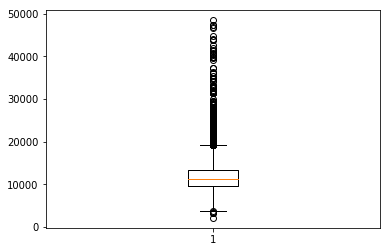

In [69]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [70]:
df=df[(df['cena_metr_kw']<55000) & (df['cena_metr_kw']>4000)].copy()#usuwam skrajne wartosci gdy cena_mkw jest > niz 55000 i mniejsze niz 4000 za mkw

In [71]:
df[df['cena_metr_kw']<4000]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


{'whiskers': [<matplotlib.lines.Line2D at 0x22a048f9860>,
 'caps': [<matplotlib.lines.Line2D at 0x22a04903160>,
 'boxes': [<matplotlib.lines.Line2D at 0x22a048f9710>],
 'medians': [<matplotlib.lines.Line2D at 0x22a049039b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22a04903dd8>],
 'means': []}

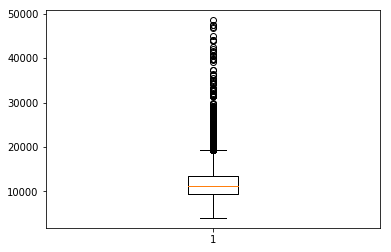

In [72]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.boxplot(df['cena_metr_kw'])

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

In [73]:
df.lokalizacja.explode()

0          Warszawa
0           Mokotów
0       mazowieckie
1          Warszawa
1           Mokotów
           ...     
8663           Wola
8663    mazowieckie
8664       Warszawa
8664        Bielany
8664    mazowieckie
Name: lokalizacja, Length: 25751, dtype: object

In [74]:
df['cena_metr_kw'].mean()

11910.3431542461

In [75]:
df['cena_metr_kw'].min()

4045

In [76]:
df['cena_metr_kw'].max()

48501

In [77]:
df['cena_metr_kw'].median()

11184.0

In [78]:
test=unnesting(df, ['lokalizacja'], axis=0)

In [79]:
test

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
0,Warszawa,Mokotów,mazowieckie,18310259,Mieszkanie Warszawa Mokotów,1 870 000,"21 976,73 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Numer referencyjny]","[85,09 m, 3, 2, 2005, apartamentowiec, 3, gratka-438025]","Powierzchnia w m2 85,09 m Liczba pokoi 3 Piętro 2 Rok budowy 2005 Typ zabudowy apartamentowiec Liczba pięter w budynku 3 Numer referencyjny gratka-438025",2,85,3,NaN,3,apartamentowiec,2005,NaN,21976
1,Warszawa,Mokotów,mazowieckie,18606195,"Mieszkanie Warszawa Mokotów, ul. Sardyńska",507 000,"11 985,82 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[42,30 m, 2, 10, spółdzielcze własnościowe z KW, wysoki standard, 1976, blok, płyta, 10, gratka-325/9140/OMS]","Powierzchnia w m2 42,30 m Liczba pokoi 2 Piętro 10 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1976 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 10 Numer referencyjny gratka-325/9140/OMS",1,42,2,NaN,10,blok,1976,płyta,11985
2,Warszawa,Wola,mazowieckie,18612157,"Mieszkanie Warszawa Wola, ul. Góralska",399 000,"10 336,79 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[38,60 m, 2, parter, do remontu, 1970, blok, płyta, 9, 1, oddzielna, tak, gratka-333/9140/OMS]","Powierzchnia w m2 38,60 m Liczba pokoi 2 Piętro parter Stan do remontu Rok budowy 1970 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 9 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-333/9140/OMS",NaN,38,2,NaN,9,blok,1970,płyta,10336
3,Warszawa,Wilanów,mazowieckie,18013527,"Mieszkanie Warszawa Wilanów, ul. Urodzajna",1 790 000,"10 028,01 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[178,50 m, 4, 2, 2008, 2, gratka-MS756210]","Powierzchnia w m2 178,50 m Liczba pokoi 4 Piętro 2 Rok budowy 2008 Liczba pięter w budynku 2 Numer referencyjny gratka-MS756210",2,178,4,NaN,2,NaN,2008,NaN,10028
4,Warszawa,Wilanów,mazowieckie,18337701,"Mieszkanie Warszawa Wilanów, ul. Syta",1 540 000,15 400 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[100 m, 3, parter, 2014, 3, gratka-172880]",Powierzchnia w m2 100 m Liczba pokoi 3 Piętro parter Rok budowy 2014 Liczba pięter w budynku 3 Numer referencyjny gratka-172880,NaN,100,3,NaN,3,NaN,2014,NaN,15400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,Warszawa,Targówek,mazowieckie,18387215,Mieszkanie Warszawa Targówek,539 000,9 625 zł/m,"[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[56 m, 3, 2, własność, 1976, blok, 9, tak, gratka-2195, osobne WC]",Powierzchnia w m2 56 m Liczba pokoi 3 Piętro 2 Forma własności własność Rok budowy 1976 Typ zabudowy blok Liczba pięter w budynku 9 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-2195 Forma / wyposażenie łazienki osobne WC,2,56,3,NaN,9,blok,1976,NaN,9625
8661,Warszawa,Rembertów,mazowieckie,18386591,Mieszkanie Warszawa Rembertów,480 000,"8 040,20 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Liczba pięter w budynku, Numer referencyjny]","[59,70 m, 3, parter, 1957, 2, gratka-945773]","Powierzchnia w m2 59,70 m Liczba pokoi 3 Piętro parter Rok budowy 1957 Liczba pięter w budynku 2 Numer referencyjny gratka-945773",NaN,59,3,NaN,2,NaN,1957,NaN,8040
8662,Warszawa

In [80]:
test.groupby('lokalizacja1').count()

,lokalizacja0,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
lokalizacja1,,,,,,,,,,,,,,,,,,
Anin,2,2,2,2,2,2,2,2,2,1,2,2,1,2,1,2,1,2
Augustów,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1
Bemowo,451,451,451,451,451,451,451,451,451,360,451,450,63,436,394,386,239,451
Białołęka,605,605,605,605,605,605,605,605,605,498,605,605,44,591,529,390,206,605
Bielany,355,355,355,355,355,355,355,355,355,324,355,353,51,348,302,324,198,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zawady,7,7,7,7,7,7,7,7,7,6,7,7,1,7,6,5,4,7
mazowieckie,214,0,214,214,214,214,214,214,214,176,214,214,17,129,193,127,71,214
Śródmieście,985,985,985,985,985,985,985,985,985,869,985,983,110,912,799,854,547,985


In [81]:
test.lokalizacja1.unique()

array(['Mokotów', 'Wola', 'Wilanów', 'Ochota', 'Targówek', 'Śródmieście',
       'Żoliborz', 'Ursynów', 'Bielany', 'Białołęka', 'Praga-Południe',
       'Bemowo', 'mazowieckie', 'Włochy', 'Praga-Północ', 'Ursus',
       'Rembertów', 'Gocław', 'Wawer', 'Dolny Mokotów', 'Bródno',
       'Tarchomin', 'Królikarnia', 'Służewiec', 'Wesoła', 'Muranów',
       'Górny Mokotów', 'Stegny', 'Czyste', 'Powiśle', 'Szmulki',
       'Ulrychów', 'Nowe Miasto', 'Skorosze', 'Jelonki', 'Szczęśliwice',
       'Piaski', 'Saska Kępa', 'Stare Miasto', 'Nowodwory',
       'Marysin Wawerski', 'Groty', 'Wyczółki', 'Imielin', 'Służew',
       'Młynów', 'Zawady', 'Słodowiec', 'Sadyba', 'Anin', 'Grochów',
       'Natolin', 'Odolany', 'Powązki', 'Olszynka Grochowska', 'Zacisze',
       'Sielce', 'Młociny', 'Chomiczówka', 'Żerań', 'Kabaty', 'Wierzbno',
       'Wawrzyszew', 'Marymont', 'Miedzeszyn', 'Gocławek', 'Rakowiec',
       'Nowe Górce', 'Kępa Tarchomińska', 'Międzylesie', 'Siekierki',
       'Kamionek', 'Praga'

In [82]:
test.lokalizacja0.unique()

array(['Warszawa'], dtype=object)

In [83]:
test.lokalizacja2.unique()

array(['mazowieckie', None], dtype=object)

In [84]:
df.pokoje.value_counts()

 3    3125
 2    3045
 4    1225
 1     820
 5     317
 6      78
 7      23
Name: pokoje, dtype: int64

In [85]:
cena_calosc=[]
for words in df['cena']:
    cena_calosc.append(re.sub(r"\s",'',  words))

In [86]:
#robie przykładowo jak to zmienic

In [87]:
df.cena=cena_calosc

In [88]:
df.cena.replace('\D\d+','',regex=True,inplace=True)

In [89]:
df.cena=df.cena.astype(int)

In [90]:
#cena_za_metr     zmienic na float, stadardowo jest na int, bo zrobilem funkcje podlogi, ale to do przemyslenia.
#                    NA TEN MOMENT ZOSTAJE i korzystam ze zmiennej cena_metr_kw      
#powierzchnia      zmienic na float
#pokoje            RACZEJ zostawic - zmienie bo nie moge robic relacji pomiedzy nimi
#oplaty             zmienic na float
#

In [91]:
df.pokoje.replace(np.NaN,0,inplace=True)

In [92]:
df[df['pokoje'].isnull()]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw


In [93]:
df.pokoje=df.pokoje.astype(int)

In [94]:
#powierzchnia

df.powierzchnia=df.powierzchnia.astype(int)

In [95]:
df[df.pokoje>5]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
53,18431417,"Mieszkanie Warszawa Włochy, ul. Poziomkowa",1690000,"11 437,47 zł/m","[Warszawa, Włochy, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[147,76 m, 6, parter, własność, 2020, cegła, 3, 1, oddzielna, tak, gratka-169/783/OMS]","Powierzchnia w m2 147,76 m Liczba pokoi 6 Piętro parter Forma własności własność Rok budowy 2020 Materiał budynku cegła Liczba pięter w budynku 3 Liczba miejsc parkingowych 1 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-169/783/OMS",NaN,147,6,NaN,3,NaN,2020,cegła,11437
100,18599419,"Mieszkanie Warszawa Wola, ul. Łucka",2699000,"10 783,06 zł/m","[Warszawa, Wola, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[250,30 m, 6, 13, spółdzielcze własnościowe z KW, do remontu, 1998, apartamentowiec, 13, 1, tak, gratka-74/10573/OMS]","Powierzchnia w m2 250,30 m Liczba pokoi 6 Piętro 13 Forma własności spółdzielcze własnościowe z KW Stan do remontu Rok budowy 1998 Typ zabudowy apartamentowiec Liczba pięter w budynku 13 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-74/10573/OMS",1,250,6,NaN,13,apartamentowiec,1998,NaN,10783
117,18518859,"Mieszkanie Warszawa Ursynów, ul. Nowoursynowska",1200000,7 500 zł/m,"[Warszawa, Ursynów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[160 m, 6, 4, własność, do odświeżenia, 1995, blok, 4, tak, gratka-10580/4595/OMS]",Powierzchnia w m2 160 m Liczba pokoi 6 Piętro 4 Forma własności własność Stan do odświeżenia Rok budowy 1995 Typ zabudowy blok Liczba pięter w budynku 4 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-10580/4595/OMS,4,160,6,NaN,4,blok,1995,NaN,7500
166,18481503,"Mieszkanie Warszawa Mokotów, ul. Huculska",2789000,"15 324,18 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[182 m, 6, 5, własność, 2018, apartamentowiec, 6, 1, tak, gratka-18853/2089/OMS]",Powierzchnia w m2 182 m Liczba pokoi 6 Piętro 5 Forma własności własność Rok budowy 2018 Typ zabudowy apartamentowiec Liczba pięter w budynku 6 Liczba miejsc parkingowych 1 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-18853/2089/OMS,5,182,6,NaN,6,apartamentowiec,2018,NaN,15324
190,13308539,"Mieszkanie Warszawa Bemowo, ul. Widawska",1160000,"9 871,50 zł/m","[Warszawa, Bemowo, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[117,51 m, 6, 3, spółdzielcze własnościowe, do remontu, 1998, blok, cegła, 4, w garażu, oddzielna, gratka-15824/3685/OMS]","Powierzchnia w m2 117,51 m Liczba pokoi 6 Piętro 3 Forma własności spółdzielcze własnościowe Stan do remontu Rok budowy 1998 Typ zabudowy blok Materiał budynku cegła Liczba pięter w budynku 4 Miejsce parkingowe w garażu Forma kuchni oddzielna Numer referencyjny gratka-15824/3685/OMS",3,117,6,NaN,4,blok,1998,cegła,9871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,18336605,"Mieszkanie Warszawa Mokotów, ul. Warowna",4100000,"17 753,53 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, 

In [96]:
test[test.lokalizacja1=='mazowieckie']#to mozemy wywalic gdy zachodzi taki warunek, bo tak naprawde to dla celow statytycznych tylko

,lokalizacja0,lokalizacja1,lokalizacja2,numer_ogloszenia,tytul,cena,cena_za_metr,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw
45,Warszawa,mazowieckie,None,18431509,"Mieszkanie Warszawa, ul. Cybernetyki",439 846,"10 475,02 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[41,99 m, 2, 1, własność, 2020, blok, pustak, 7, 1, w aneksie, tak, gratka-316/5075/OMS]","Powierzchnia w m2 41,99 m Liczba pokoi 2 Piętro 1 Forma własności własność Rok budowy 2020 Typ zabudowy blok Materiał budynku pustak Liczba pięter w budynku 7 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-316/5075/OMS",1,41,2,NaN,7,blok,2020,pustak,10475
160,Warszawa,mazowieckie,None,18457273,"Mieszkanie Warszawa, ul. Sarmacka",1 447 000,"10 798,51 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Numer referencyjny]","[134 m, 4, 1, własność, wysoki standard, apartamentowiec, 4, 1, w aneksie, gratka-67/8962/OMS]",Powierzchnia w m2 134 m Liczba pokoi 4 Piętro 1 Forma własności własność Stan wysoki standard Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Numer referencyjny gratka-67/8962/OMS,1,134,4,NaN,4,apartamentowiec,NaN,NaN,10798
162,Warszawa,mazowieckie,None,18457495,"Mieszkanie Warszawa, ul. Górnośląska",619 000,"13 311,83 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[46,50 m, 3, 2, spółdzielcze własnościowe z KW, wysoki standard, 1980, blok, rama H, 10, w aneksie, tak, gratka-86/8962/OMS]","Powierzchnia w m2 46,50 m Liczba pokoi 3 Piętro 2 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1980 Typ zabudowy blok Materiał budynku rama H Liczba pięter w budynku 10 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-86/8962/OMS",2,46,3,NaN,10,blok,1980,rama,13311
207,Warszawa,mazowieckie,None,18497757,"Mieszkanie Warszawa, ul. Dzieci Warszawy",306 583,"10 776,20 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[28,45 m, 1, parter, własność, 2021, apartamentowiec, 4, w aneksie, tak, gratka-1.A.0.13, osobne WC]","Powierzchnia w m2 28,45 m Liczba pokoi 1 Piętro parter Forma własności własność Rok budowy 2021 Typ zabudowy apartamentowiec Liczba pięter w budynku 4 Forma kuchni w aneksie Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-1.A.0.13 Forma / wyposażenie łazienki osobne WC",NaN,28,1,NaN,4,apartamentowiec,2021,NaN,10776
235,Warszawa,mazowieckie,None,18431505,"Mieszkanie Warszawa, ul. Cybernetyki",528 422,"10 197,26 zł/m","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Forma kuchni, Dostępność od, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[51,82 m, 3, 6, własność, 2020, blok, 7, 1, w aneksie, 2020-10-30, tak, gratka-319/5075/OMS]","Powierzchnia w m2 51,82 m Liczba pokoi 3 Piętro 6 Forma własności własność Rok budowy 2020 Typ zabudowy blok Liczba pięter w budynku 7 Liczba miejsc parkingowych 1 Forma kuchni w aneksie Dostępność od 2020-10-30 Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-319/5075/OMS",6,51,3,NaN,7,blok,2020,NaN,10197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,Warszawa,mazowieckie,None,18315949,"Nowe mieszkanie Warszawa, ul. Jana Nowaka-Jeziorańskiego 8",461 

In [97]:
df['dzielnica']=test.iloc[:,1]

# WIZUALIZACJA

(array([5.172e+03, 2.666e+03, 5.940e+02, 1.600e+02, 3.700e+01, 1.600e+01,
        4.000e+00, 4.000e+00, 0.000e+00, 2.000e+00]),
 array([ 14. ,  62.6, 111.2, 159.8, 208.4, 257. , 305.6, 354.2, 402.8,
        451.4, 500. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'powierzchnia')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram powierzchnia')

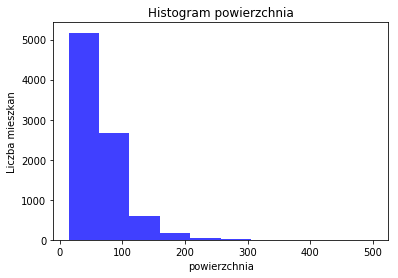

In [98]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['powierzchnia'],facecolor='b', alpha=0.75)



plt.xlabel('powierzchnia')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram powierzchnia')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([1050., 5126., 1867.,  443.,   76.,   36.,   28.,    8.,   15.,
           6.]),
 array([ 4045. ,  8490.6, 12936.2, 17381.8, 21827.4, 26273. , 30718.6,
        35164.2, 39609.8, 44055.4, 48501. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena/mkw')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena/mkw')

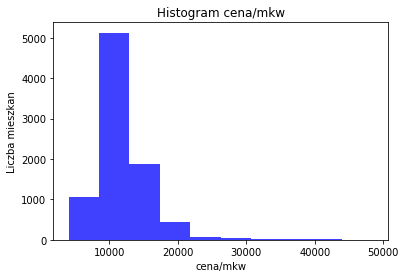

In [99]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena_metr_kw'],facecolor='b', alpha=0.75)



plt.xlabel('cena/mkw')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena/mkw')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([8.032e+03, 4.840e+02, 8.100e+01, 2.600e+01, 1.900e+01, 5.000e+00,
        6.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  180000.,  1568240.,  2956480.,  4344720.,  5732960.,  7121200.,
         8509440.,  9897680., 11285920., 12674160., 14062400.]),
 <a list of 10 Patch objects>)

Text(0.5,0,'cena')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram cena')

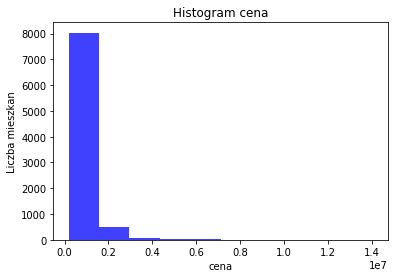

In [100]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['cena'],facecolor='b', alpha=0.75)



plt.xlabel('cena')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram cena')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

(array([  22.,  820., 3045.,    0., 3125., 1225.,    0.,  317.,   78.,
          23.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

Text(0.5,0,'pokoje')

Text(0,0.5,'Liczba mieszkan')

Text(0.5,1,'Histogram pokoje')

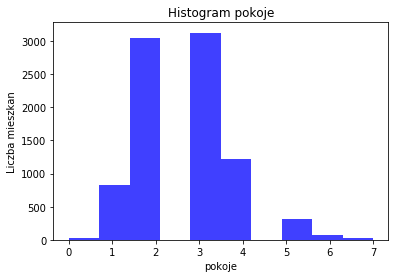

In [101]:
fig, ax = plt.subplots()

# Plot a bar-chart of gold medals as a function of country
ax.hist(df['pokoje'],facecolor='b', alpha=0.75)



plt.xlabel('pokoje')
plt.ylabel('Liczba mieszkan')
plt.title('Histogram pokoje')
# Set the x-axis tick labels to the country names
#ax.set_xticklabels(df.index, rotation=90)

# Set the y-axis label
#ax.set_ylabel('Number of medals')

plt.show()

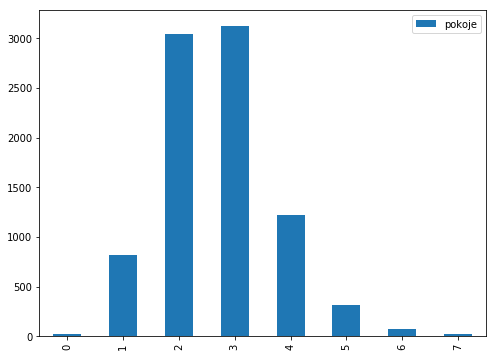

In [102]:
#wykres do tego fajnie by zrobic
df['pokoje'].value_counts().sort_index().plot.bar(figsize=(8, 6),legend=True)


In [103]:
import seaborn as sns


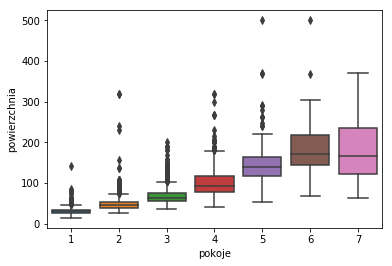

In [104]:
sns.boxplot(x="pokoje", y="powierzchnia", data=df[df.pokoje>0])

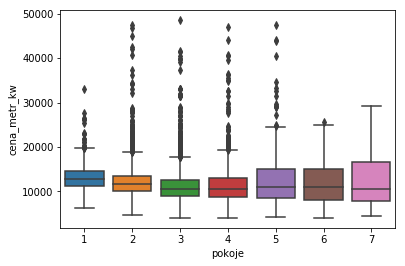

In [105]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [106]:
#widac, ze wraz ze wzrostem liczby pokoi średnia cena za mkw spada

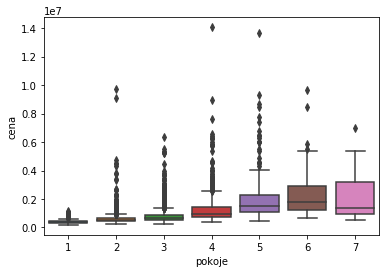

In [107]:
sns.boxplot(x="pokoje", y="cena", data=df[df.pokoje>0])

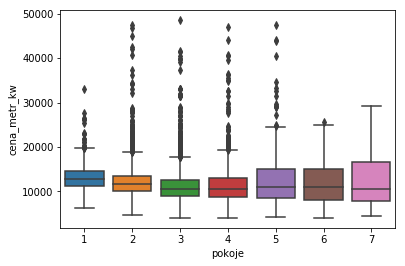

In [108]:
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

### cena przy wiekszej liczbie pokoi rosnie, ale cena za metr kwadratowy przy wiekszej liczbie pokoi juz niekoniecznie

In [109]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Stare Miasto,1340000.0,19736.0
1,Czyste,667832.0,16681.5
2,Powązki,657000.0,16512.0
3,Muranów,1277000.0,16211.5
4,Nowe Miasto,548500.0,15633.5
...,...,...,...
81,Wesoła,530000.0,7600.0
82,Stara Miłosna,568500.0,7148.5
83,Augustów,380819.0,6591.0
84,Kępa Tarchomińska,1150000.0,6284.0


In [110]:
#df.groupby('lokalizacja').mean()
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False),2)

,cena,cena_metr_kw
dzielnica,,
Stare Miasto,1534090.91,20201.27
Śródmieście,1338202.93,17216.10
Powiśle,1368988.23,16576.39
Muranów,1277000.00,16211.50
Czyste,903616.40,16029.60
...,...,...
Rembertów,435025.68,7661.36
Stara Miłosna,578750.00,7066.75
Augustów,380819.00,6591.00


In [111]:
df.groupby('dzielnica')[['cena','cena_metr_kw']].median()

,cena,cena_metr_kw
dzielnica,,
Anin,1015000.0,9859.5
Augustów,380819.0,6591.0
Bemowo,593500.0,9862.0
Białołęka,440000.0,8050.0
Bielany,530000.0,10405.0
...,...,...
Zawady,1250000.0,10862.0
mazowieckie,576100.0,11019.5
Śródmieście,895000.0,15531.0


In [112]:
pd.options.display.max_rows = 999

In [113]:
df.dzielnica.value_counts()

Mokotów                1345
Śródmieście             985
Wola                    874
Praga-Południe          616
Białołęka               605
Ursynów                 478
Bemowo                  451
Ochota                  393
Wilanów                 356
Bielany                 355
Ursus                   295
Targówek                282
Praga-Północ            245
Żoliborz                239
mazowieckie             214
Włochy                  169
Wawer                   132
Gocław                   52
Rembertów                50
Górny Mokotów            48
Sadyba                   38
Powiśle                  31
Wesoła                   29
Bródno                   25
Grochów                  22
Stegny                   19
Saska Kępa               19
Służewiec                18
Kabaty                   18
Tarchomin                18
Gocławek                 15
Dolny Mokotów            14
Szczęśliwice             13
Stare Miasto             11
Czyste                   10
Skorosze            

In [114]:
# mazowieckie damy, że to jest "INNE"

In [115]:
#Prawilna lista dzielnic https://pl.wikipedia.org/wiki/Podzia%C5%82_administracyjny_Warszawy
 
#     Bemowo
#     Białołęka
#     Bielany
#     Mokotów
#     Ochota
#     Praga Południe
#     Praga Północ
#     Rembertów
#     Śródmieście
#     Targówek
#     Ursus
#     Ursynów
#     Wawer
#     Wesoła
#     Wilanów
#     Włochy
#     Wola
#     Żoliborz


In [116]:
df.dzielnica.replace('WILANÓW','Wilanów',inplace=True)

### Przypisanie dzielnic 

In [117]:
# Źródłow https://pl.wikipedia.org/wiki/Mokot%C3%B3w i drugie jeszcze dodatam xD
df.dzielnica.replace(['Stary Mokotów','Sielce','Czerniaków','Siekierki','Augustówka','Sadyba','Stegny','Wierzbno','Ksawerów','Służew','Służewiec','Wyględów','Górny Mokotów','Dolny Mokotów','Królikarnia'],'Mokotów',inplace=True)

In [118]:
#https://pl.wikipedia.org/wiki/%C5%9Ar%C3%B3dmie%C5%9Bcie_(Warszawa)

In [119]:
df.dzielnica.replace(['Powiśle','Stare Miasto','Muranów','Centrum','Nowe Miasto','Mariensztat','Latawiec'],'Śródmieście',inplace=True)

In [120]:
#https://pl.wikipedia.org/wiki/Miejski_System_Informacji_(Warszawa)

In [121]:
df.dzielnica.replace(['Grochów','Gocław','Gocławek','Olszynka Grochowska','Saska Kępa','Kamionek'],'Praga-Południe',inplace=True)

In [122]:
df.dzielnica.replace(['Elsnerów','Bródno','Zacisze','Utrata'],'Targówek',inplace=True)

In [123]:
df.dzielnica.replace(['Młociny','Marymont','Słodowiec','Wawrzyszew','Wrzeciono','Chomiczówka','Piaski'],'Bielany',inplace=True)

In [124]:
df.dzielnica.replace(['Choszczówka','Grodzisk','Nowodwory','Tarchomin','Żerań','Białołęka Dworska','Lewandów','Dąbrówka Szlachecka','Augustów','Kępa Tarchomińska'],'Białołęka',inplace=True)

In [125]:
df.dzielnica.replace(['Chrzanów','Górce','Jelonki','Groty','Fort Bema','Nowe Górce','Karolin'],'Bemowo',inplace=True)

In [126]:
df.dzielnica.replace(['Czyste','Koło','Młynów','Mirów','Nowolipki','Odolany','Powązki','Ulrychów'],'Wola',inplace=True)

In [127]:
df.dzielnica.replace(['Filtry','Rakowiec','Szczęśliwice','Stara Ochota'],'Ochota',inplace=True)

In [128]:
df.dzielnica.replace(['Nowe Włochy','Okęcie','Paluch','Raków'],'Włochy',inplace=True)

In [129]:
df.dzielnica.replace(['Kabaty','Grabów','Natolin','Imielin','Wyczółki','Pyry'],'Ursynów',inplace=True)

In [130]:
df.dzielnica.replace(['Czechowice','Gołąbki','Niedźwiadek','Skorosze','Szamoty'],'Ursus',inplace=True)

In [131]:
df.dzielnica.replace(['Powsinek','Zawady','Kępa Zawadowska','Powsin'],'Wilanów',inplace=True)

In [132]:
df.dzielnica.replace(['Aleksandrów','Anin','Falenica','Las','Miedzeszyn','Międzylesie','Marysin Wawerski','Radość','Zerzeń','Zbytki','Borków','Sadul'],'Wawer',inplace=True)

In [133]:
df.dzielnica.replace(['Szmulki','Szmulowizna','Praga','Pelcowizna'],'Praga-Północ',inplace=True)

In [134]:
df.dzielnica.replace(['Nowy Rembertów','Stary Rembertów','Kawęczyn-Wygoda'],'Rembertów',inplace=True)

In [135]:
df.dzielnica.replace(['Stara Miłosna','Wola Grzybowska'],'Wesoła',inplace=True)

In [136]:
df.dzielnica.replace(['Cytadela'],'Żoliborz',inplace=True)

In [137]:
df.dzielnica.replace(['mazowieckie'],'brak informacji',inplace=True)

In [138]:
# df.dzielnica.value_counts()

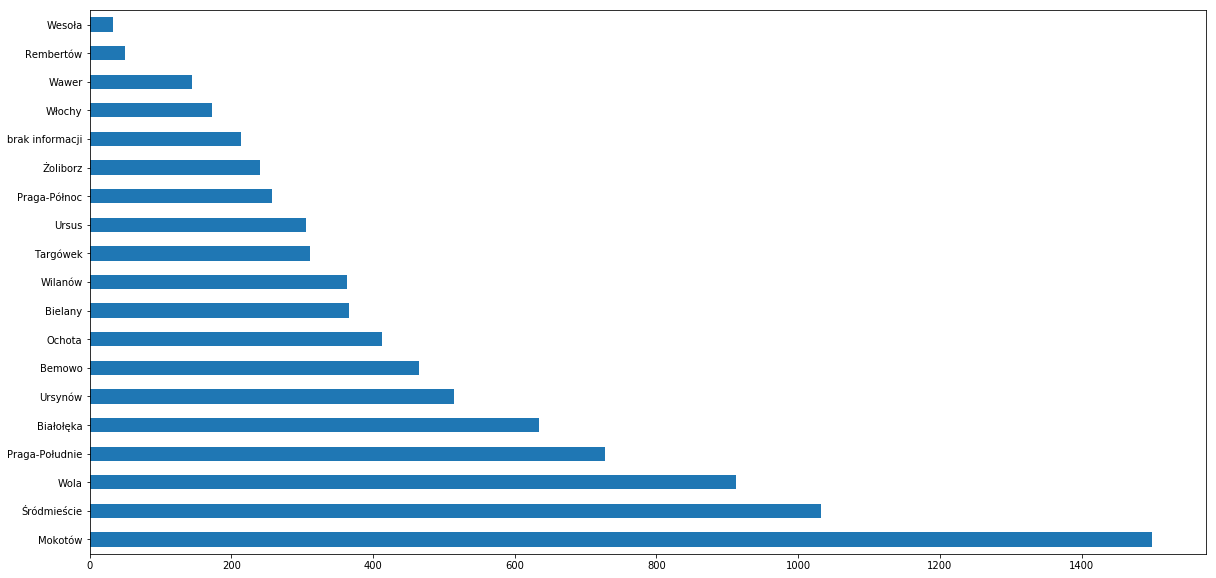

In [139]:
df['dzielnica'].value_counts().plot(kind='barh',figsize=(20,10))

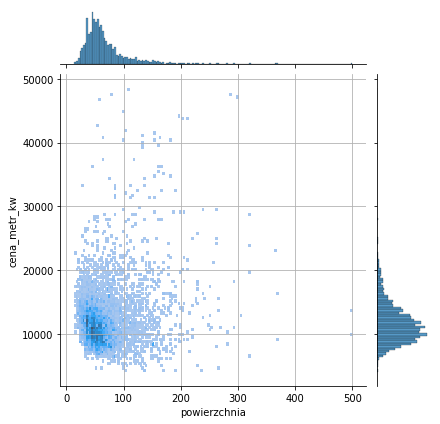

In [140]:
#To sie liczy kilkanasie minut i nic z tego nie ma
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0],kind="hist")


 


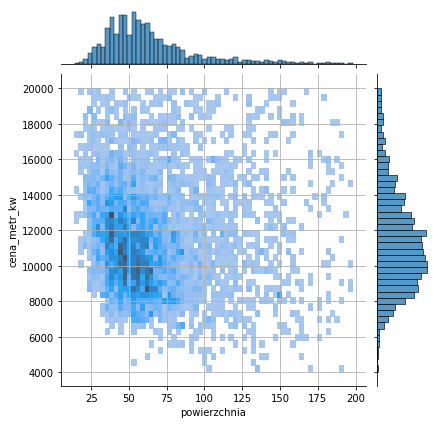

In [141]:
sns.jointplot(x="powierzchnia", y="cena_metr_kw", data=df[(df.pokoje>0)&(df.cena_metr_kw<20000)&(df.powierzchnia<200)],kind="hist")

2020-10-22 15:59:08 [py.warnings] WARNING: C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.



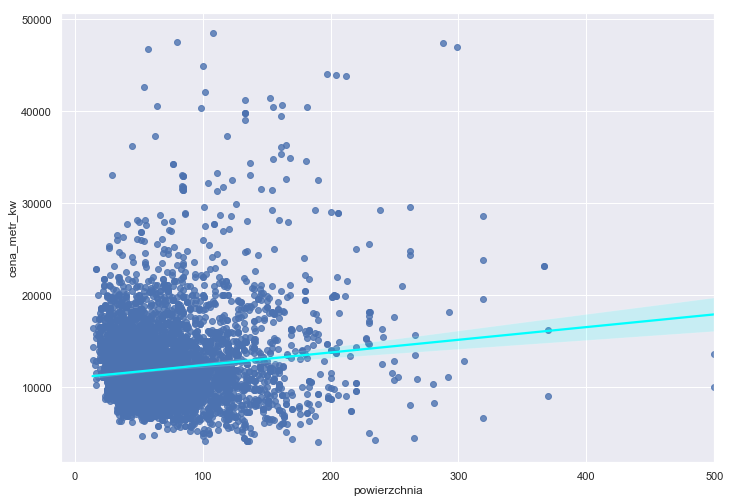

In [142]:
import pandas.util.testing as tm

# use the function regplot to make a scatterplot
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x="powierzchnia", y="cena_metr_kw", data=df[df.pokoje>0],line_kws=({'color':'cyan'}))
#sns.plt.show()

In [143]:
df.cena_metr_kw.mean()

11910.3431542461

<Figure size 1440x864 with 0 Axes>

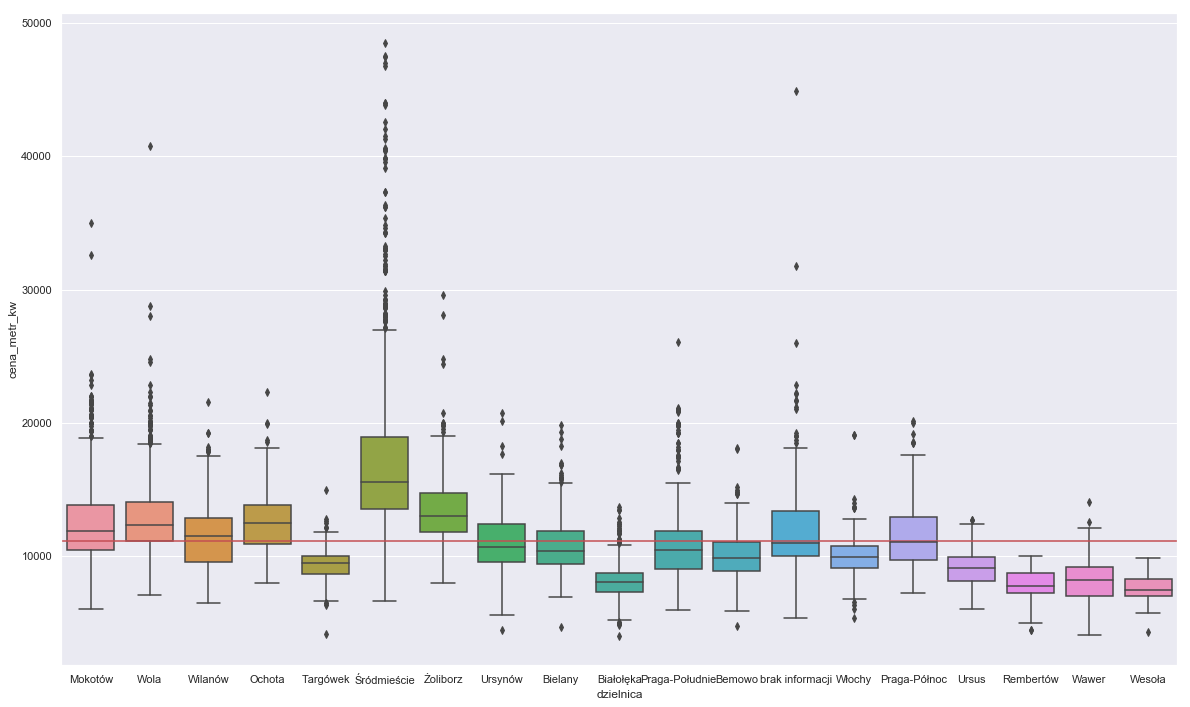

In [144]:
plt.figure(figsize=(20,12))
sns.boxplot(x="dzielnica", y="cena_metr_kw", data=df[df.pokoje>0])
plt.axhline(y=df.cena_metr_kw.median(),color='r')#srednia dla całego miasta

In [145]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].median().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,899000.0,15541.5
1,Żoliborz,787500.0,13017.5
2,Ochota,650000.0,12500.0
3,Wola,615000.0,12370.0
4,Mokotów,693440.0,11866.5
5,Wilanów,828000.0,11529.0
6,Praga-Północ,550000.0,11057.0
7,brak informacji,576100.0,11019.5
8,Ursynów,650000.0,10717.0
9,Praga-Południe,559000.0,10461.0


In [146]:
round(df.groupby('dzielnica')[['cena','cena_metr_kw']].mean().sort_values(by='cena_metr_kw',ascending=False).reset_index(),2)

,dzielnica,cena,cena_metr_kw
0,Śródmieście,1338989.26,17219.40
1,Żoliborz,1088831.48,13550.81
2,Wola,744903.29,13011.31
3,Ochota,811462.41,12537.49
4,brak informacji,727073.57,12408.57
5,Mokotów,926099.72,12387.13
6,Wilanów,1041087.86,11557.01
7,Praga-Północ,655196.59,11413.99
8,Ursynów,744781.23,10941.83
9,Bielany,629724.58,10914.49


In [147]:
df[df.dzielnica=='Mokotów']

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica
0,18310259,Mieszkanie Warszawa Mokotów,1870000,"21 976,73 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Rok budowy, Typ zabudowy, Liczba pięter w budynku, Numer referencyjny]","[85,09 m, 3, 2, 2005, apartamentowiec, 3, gratka-438025]","Powierzchnia w m2 85,09 m Liczba pokoi 3 Piętro 2 Rok budowy 2005 Typ zabudowy apartamentowiec Liczba pięter w budynku 3 Numer referencyjny gratka-438025",2,85,3,NaN,3,apartamentowiec,2005,NaN,21976,Mokotów
1,18606195,"Mieszkanie Warszawa Mokotów, ul. Sardyńska",507000,"11 985,82 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Numer referencyjny]","[42,30 m, 2, 10, spółdzielcze własnościowe z KW, wysoki standard, 1976, blok, płyta, 10, gratka-325/9140/OMS]","Powierzchnia w m2 42,30 m Liczba pokoi 2 Piętro 10 Forma własności spółdzielcze własnościowe z KW Stan wysoki standard Rok budowy 1976 Typ zabudowy blok Materiał budynku płyta Liczba pięter w budynku 10 Numer referencyjny gratka-325/9140/OMS",1,42,2,NaN,10,blok,1976,płyta,11985,Mokotów
7,17459207,"Mieszkanie Warszawa Mokotów, ul. Karola Chodkiewicza",2147630,"15 181,89 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Miejsce parkingowe, Forma kuchni, Numer referencyjny]","[141,46 m, 5, 4, własność, 2005, apartamentowiec, cegła, 7, w garażu, w aneksie, gratka-18202/3685/OMS]","Powierzchnia w m2 141,46 m Liczba pokoi 5 Piętro 4 Forma własności własność Rok budowy 2005 Typ zabudowy apartamentowiec Materiał budynku cegła Liczba pięter w budynku 7 Miejsce parkingowe w garażu Forma kuchni w aneksie Numer referencyjny gratka-18202/3685/OMS",4,141,5,NaN,7,apartamentowiec,2005,cegła,15181,Mokotów
10,18536203,"Mieszkanie Warszawa Mokotów, ul. Bokserska",525000,"11 508,11 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Stan, Rok budowy, Typ zabudowy, Materiał budynku, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[45,62 m, 3, 3, własność, wysoki standard, 1970, blok, rama H, 4, oddzielna, tak, gratka-54625/3098/OMS]","Powierzchnia w m2 45,62 m Liczba pokoi 3 Piętro 3 Forma własności własność Stan wysoki standard Rok budowy 1970 Typ zabudowy blok Materiał budynku rama H Liczba pięter w budynku 4 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-54625/3098/OMS",3,45,3,NaN,4,blok,1970,rama,11508,Mokotów
14,18432301,"Mieszkanie Warszawa Mokotów, ul. Racławicka 6",469000,"11 140,14 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Typ zabudowy, Liczba pięter w budynku, Forma kuchni, Czy mieszkanie ma łazienkę?, Numer referencyjny, Forma / wyposażenie łazienki]","[42,10 m, 2, 2, spółdzielcze własnościowe, blok, 10, oddzielna, tak, gratka-304573, osobne WC]","Powierzchnia w m2 42,10 m Liczba pokoi 2 Piętro 2 Forma własności spółdzielcze własnościowe Typ zabudowy blok Liczba pięter w budynku 10 Forma kuchni oddzielna Czy mieszkanie ma łazienkę? tak Numer referencyjny gratka-304573 Forma / wyposażenie łazienki osobne WC",2,42,2,NaN,10,blok,NaN,NaN,11140,Mokotów
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8628,18343157,"Mieszkanie Warszawa Mokotów, ul. Racławicka",2550000,"21 518,99 zł/m","[Warszawa, Mokotów, mazowieckie]","[Powierzchnia w m2, Liczba pokoi, Piętro, Forma własności, Rok budowy, Liczba pięter w budynku, Liczba miejsc parkingowych, Dostępność od, Czy mieszkanie ma łazienkę?, Numer referencyjny]","[118,50 m, 3, 1, własność, 2006, 4, 1, 2011-10-28, tak, gratka-143430029]","Powierzchnia w m2

<Figure size 1440x864 with 0 Axes>

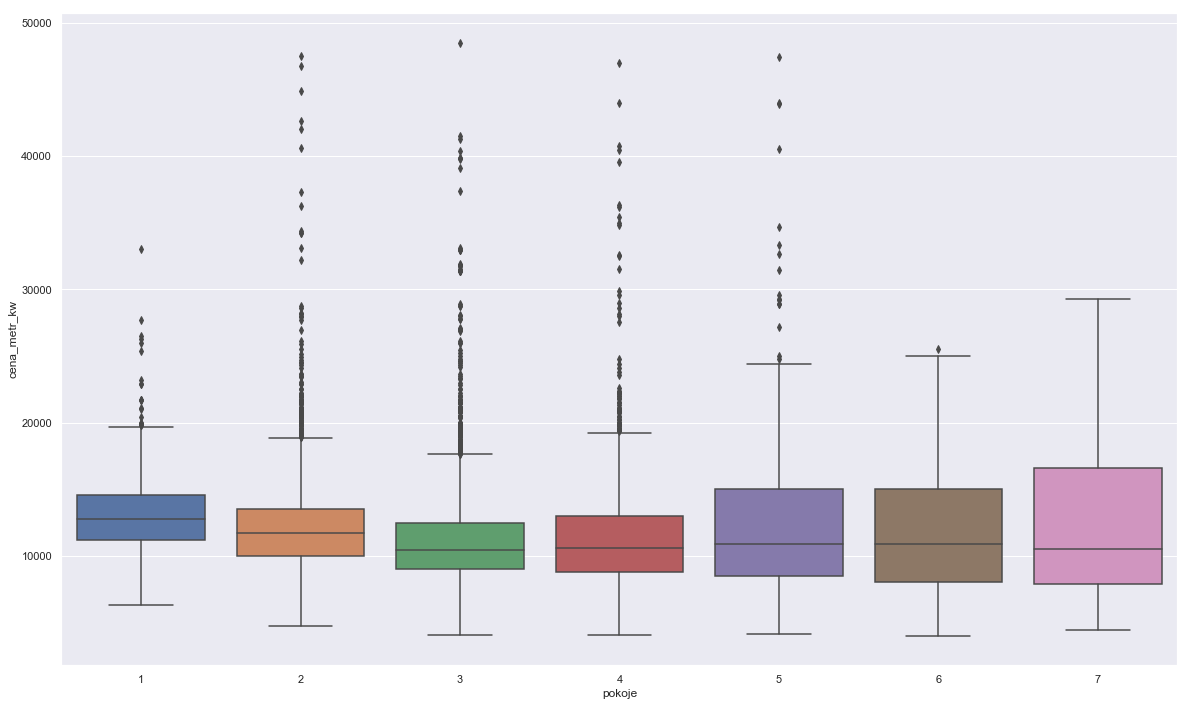

In [148]:
plt.figure(figsize=(20,12))
sns.boxplot(x="pokoje", y="cena_metr_kw", data=df[df.pokoje>0])

In [149]:
round(df[df.pokoje>0].groupby("pokoje").agg({'cena_metr_kw':['median','mean']}))

cena_metr_kw         
             median     mean
pokoje                      
1             12791  13122.0
2             11719  12211.0
3             10495  11336.0
4             10588  11624.0
5             10923  12740.0
6             10897  11943.0
7             10531  11897.0

In [150]:
# df.groupby([(pd.cut(df['powierzchnia'], bins=bins),'dzielnica').powierzchnia.count()

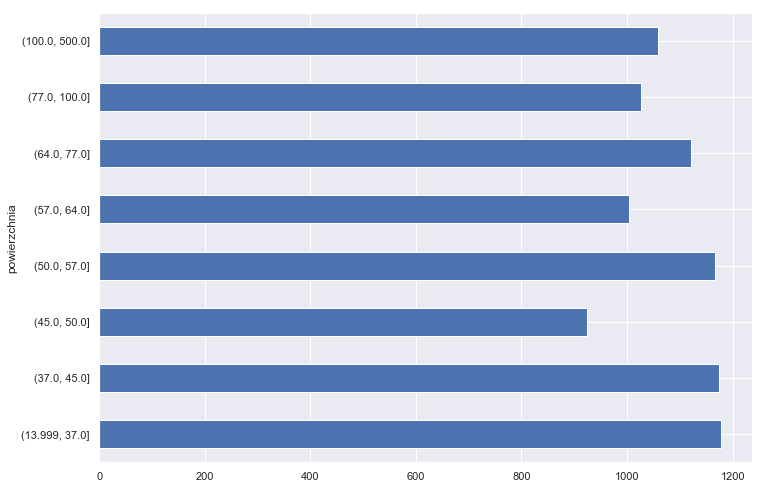

In [151]:
#bins = [0, 35, 45,55, 65,75,90,120, 1000]
df_to_plot = df.groupby(pd.qcut(df['powierzchnia'], q=8)).powierzchnia.count()
df_to_plot.plot(kind='barh')

In [152]:
df['powierzchnia_bins']=pd.qcut(df['powierzchnia'], q=8)

In [153]:
df.columns

Index(['numer_ogloszenia', 'tytul', 'cena', 'cena_za_metr', 'lokalizacja',
       'atrybuty', 'wartosci', 'opis', 'pietro', 'powierzchnia', 'pokoje',
       'oplaty', 'pietra_w_bud', 'typ_zab', 'rok_budowy', 'material',
       'cena_metr_kw', 'dzielnica', 'powierzchnia_bins'],
      dtype='object')

In [154]:
def count_below_mean(dataframe_series):
    sum(i > np.mean(dataframe_series) for i in dataframe_series)
    return dataframe_series

In [155]:
round(df.groupby(['dzielnica','powierzchnia_bins']).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean','count']}),2)

cena_metr_kw                 cena  \
                                        median      mean     median   
dzielnica       powierzchnia_bins                                     
Bemowo          (13.999, 37.0]         11933.5  11885.47   388400.0   
                (37.0, 45.0]           10880.5  11108.10   460000.0   
                (45.0, 50.0]           10323.0  10379.91   490000.0   
                (50.0, 57.0]            9886.5  10191.36   539499.5   
                (57.0, 64.0]            9529.0   9672.98   580000.0   
                (64.0, 77.0]            9625.0   9765.74   675000.0   
                (77.0, 100.0]           9334.0   9453.48   794000.0   
                (100.0, 500.0]          8128.0   8912.94   950000.0   
Białołęka       (13.999, 37.0]          8918.5   9162.39   304668.5   
                (37.0, 45.0]            8136.0   8555.92   345000.0   
                (45.0, 50.0]            8457.5   8586.59   410000.0   
                (50.0, 57.0]            7922.0   7959.99   425000.0   
                (57.0, 64.0]            7586.0   8023.60   468000.0   
                (64.0, 77.0]            8120.5   8103.63   574000.0   
                (77.0, 100.0]           7682.0   7421.63   625000.0   
                (100.0, 500.0]          6523.5   6559.97   786943.0   
Bielany         (13.999, 37.0]         12261.5  12559.50   390000.0   
                (37.0, 45.0]           10894.0  11081.82   429000.0   
                (45.0, 50.0]           10191.0  10512.78   486500.0   
                (50.0, 57.0]           10000.0  10334.54   549000.0   
                (57.0, 64.0]           10084.0  10178.39   610000.0   
                (64.0, 77.0]            9986.0  10348.33   720000.0   
                (77.0, 100.0]           9911.0  10989.10   879000.0   
                (100.0, 500.0]         14015.0  11822.87  1680000.0   
Mokotów         (13.999, 37.0]         13042.0  13350.45   400000.0   
                (37.0, 45.0]           12227.0  12237.34   495000.0   
                (45.0, 50.0]           11243.5  11704.96   547500.0   
                (50.0, 57.0]           11178.5  11496.18   600000.0   
                (57.0, 64.0]           11209.0  11495.16   686000.0   
                (64.0, 77.0]           11928.0  12157.38   835075.0   
                (77.0, 100.0]          12650.0  12996.96  1099000.0   
                (100.0, 500.0]         13045.0  13278.68  1690000.0   
Ochota          (13.999, 37.0]         12794.0  13113.88   404088.0   
                (37.0, 45.0]           12091.0  12334.40   497000.0   
                (45.0, 50.0]           11603.0  12453.68   579000.0   
                (50.0, 57.0]           11075.0  11946.63   599900.0   
                (57.0, 64.0]           11846.0  12340.20   725000.0   
                (64.0, 77.0]           13088.0  12422.71   940000.0   
                (77.0, 100.0]          12996.0  12616.91  1080000.0   
                (100.0, 500.0]         12500.0  12582.32  1515000.0   
Praga-Południe  (13.999, 37.0]         11607.0  11647.52   365000.0   
                (37.0, 45.0]           11000.0  11124.05   455000.0   
                (45.0, 50.0]           10356.0  10711.21   499500.0   
                (50.0, 57.0]           10000.0  10544.17   549000.0   
                (57.0, 64.0]            9449.0  10105.80   576550.0   
                (64.0, 77.0]           10372.0  10468.74   740000.0   
                (77.0, 100.0]           9655.5  10528.54   825000.0   
                (100.0, 500.0]         11170.0  12334.00  1233850.0   
Praga-Północ    (13.999, 37.0]         13252.0  13064.13   347000.0   
                (37.0, 45.0]           11100.5  11615.82   454500.0   
                (45.0, 50.0]           10042.0  10563.39   475000.0   
                (50.0, 57.0]            9800.0   9978.76   545000.0   
                (57.0, 64.0]           10125.0  11557.95   641754.0   
                (64.0, 77.0]           11134.0  11142.65  

In [156]:
#generalnie wszystko ponizej srednie powinno juz byc dobrą inwestycją

In [157]:
df[(df['powierzchnia_bins'].astype(str) == str(pd.Interval(left=56.0, right=63.0))) & (df['dzielnica']=='Wola')& (df['cena_metr_kw']<10482)]

,numer_ogloszenia,tytul,cena,cena_za_metr,lokalizacja,atrybuty,wartosci,opis,pietro,powierzchnia,pokoje,oplaty,pietra_w_bud,typ_zab,rok_budowy,material,cena_metr_kw,dzielnica,powierzchnia_bins


In [158]:
df.groupby(['dzielnica','pokoje']).agg({'cena_metr_kw':['median','mean','min', 'max']})

cena_metr_kw                            
                             median          mean    min    max
dzielnica       pokoje                                         
Bemowo          0            5536.0   5536.000000   5536   5536
                1           11000.0  11145.322581   8344  14029
                2           10787.0  10696.311594   4758  13750
                3            9635.0   9755.550725   6826  14794
                4            9193.0   9273.356164   5908  18125
                5            8289.0   9499.714286   7000  18019
                6            9871.0   9871.000000   9871   9871
Białołęka       1            9379.0   9337.125000   7465  13486
                2            8272.0   8528.825726   5746  13709
                3            7652.5   7832.585938   4928  12598
                4            7929.0   7757.436170   4857  10185
                5            6538.0   6531.500000   5114   8664
                6            5164.5   5164.500000   4045   6284
                7            8387.0   8387.000000   8387   8387
Bielany         0            9559.0   9559.000000   8583  10535
                1           13000.0  13624.222222  11616  19322
                2           10763.0  10999.105691   8311  16987
                3           10061.5  10688.156977   4716  19843
                4            9335.5  10176.562500   7632  15500
                5            7627.0   8501.000000   7251  11526
                6           14318.0  14318.000000  14318  14318
Mokotów         0            9934.0  10040.142857   6406  13833
                1           12879.0  13249.960000   8763  22882
                2           12159.0  12434.652525   7285  21702
                3           11298.0  11989.911348   7692  23655
                4           11946.0  12955.645299   7279  34964
                5           10690.5  12126.109756   7142  21596
                6           15293.5  13692.142857   8175  18186
                7           13035.5  12577.500000   6024  18215
Ochota          0           13899.0  13899.000000  13899  13899
                1           12800.0  13324.440678  10714  18043
                2           12207.0  12508.181818   9400  18725
                3           12019.0  12216.271186   8421  20000
                4           13157.0  12489.428571   7990  22323
                5           12497.5  12009.916667   8872  18010
                7           14523.0  14523.000000   9160  19886
Praga-Południe  1           11763.0  11750.493976   9382  16590
                2           10784.5  11029.757692   7971  19867
                3            9904.0  10484.032609   6659  26097
                4            9991.0  10394.223684   5988  20919
                5            8937.0  10489.791667   6540  20952
                6           10374.0  12159.000000   8266  20790
                7           18759.5  18759.500000  17593  19926
Praga-Północ    0            8723.0   8723.000000   8723   8723
                1           13277.5  13127.050000   7932  20000
                2           11170.0  11484.010638   8302  20147
                3           10015.0  10456.693333   7254  17614
                4           10600.0  11654.171429   8168  19148
                5           11057.0  10838.363636   8282  12893
Rembertów       1            8894.0   8528.846154   6324   9569
                2            7790.0   7716.545455   6280   8630
                3            7817.5   7803.428571   5533  10000
                4            6941.5   6763.500000   5021   8272
                5            5988.5   5988.750000   4492   7486
Targówek        0           11521.0  11521.000000  11521  11521
                1           10769.0  10806.666667   9903  12200
                2            9535.0   9818.517241   6470  14983
                3            9183.5   9153.079710   6959  11111
                4            9687.0   9220.259259   6484  10714
                5            7540.5   7849.250000   722

In [159]:
round(df.groupby(['dzielnica',]).agg({'cena_metr_kw':['median','mean'],'cena':['median','mean'],'powierzchnia':['median','mean']}),2)

cena_metr_kw              cena             powierzchnia       
                      median      mean  median        mean       median   mean
dzielnica                                                                     
Bemowo                9849.0  10035.17  595000   633705.05         62.0  64.20
Białołęka             8050.0   8138.08  442900   472549.10         55.0  59.31
Bielany              10410.5  10914.49  534500   629724.58         51.5  57.79
Mokotów              11866.5  12387.13  693440   926099.72         60.0  73.34
Ochota               12500.0  12537.49  650000   811462.41         55.0  64.49
Praga-Południe       10461.0  10852.98  559000   642397.92         54.0  58.86
Praga-Północ         11057.0  11413.99  550000   655196.59         51.0  57.92
Rembertów             7793.5   7661.36  431942   435025.68         56.5  59.96
Targówek              9473.0   9447.74  469000   514900.76         52.0  55.66
Ursus                 9120.0   9193.31  465500   505847.22         51.5  56.22
Ursynów              10717.0  10941.83  650000   744781.23         63.0  70.86
Wawer                 8202.5   8130.69  549500   606026.34         72.0  78.44
Wesoła                7500.0   7675.18  530000   525696.58         66.0  71.36
Wilanów              11529.0  11557.01  828000  1041087.86         78.0  88.83
Wola                 12370.0  13011.31  615000   744903.29         49.0  57.16
Włochy                9982.0  10104.86  615500   674623.94         61.0  68.29
brak informacji      11019.5  12408.57  576100   727073.57         50.0  57.02
Śródmieście          15541.5  17219.40  899000  1338989.26         57.0  71.35
Żoliborz             13017.5  13550.81  787500  1088831.48         62.0  74.09

In [160]:
import os
def remove_jl(name):
    if os.path.exists(name):
        os.remove(name)
    else:
        print("brak pliku o takiej nazwie")  

In [161]:



# remove_jl("quoteresult.jl")
# remove_jl("quoteresult.json")